# Analysing World happiness Ranking Data

### Step 1a: Planning 
#### Identify the information in the file your program will read

I am analysing the World Happiness Ranking data set, which includes ranks based on :

+ Happiness Rank
+ Happiness score
+ Economy..GDP per capita
+ Family
+ Freedom
+ Generosity
+ Trust,corruption,government
+ country name
+ whiskey high/low
+ dystopia score

### Step 1b: Planning 
#### Write a description of what your program will produce

+ bar chart where the y axis is the number of countries and the x axis is the happineess score which ranges from 1-8 in intervals of 0.5( for example (1-1.5),(1.5-2)....(7.5-8)) and a red bar in the end shows the average happiness score.
+ Pie chart based on happiness score of the countries in intervals of 1 point and show the highest 10% of happiness score as red slice.
+ scatterplot tracing the freedom of country on y-axis and the happiness rank on x-axis and a red point with the average freedom of the data.
+ a line graph showing the happiness rank on x-axis and the freedom on y-axis and mark the country with the highest freedom with a red point and the lowest freedom with a green point also displaying their names.

**I am going to design a function to make a line chart tracing the Freedom(y-axis) of the country according to their Happiness Rank(x-axis) and mark the country with the highest freedom with a red point and the lowest freedom with a green point and also display their names**


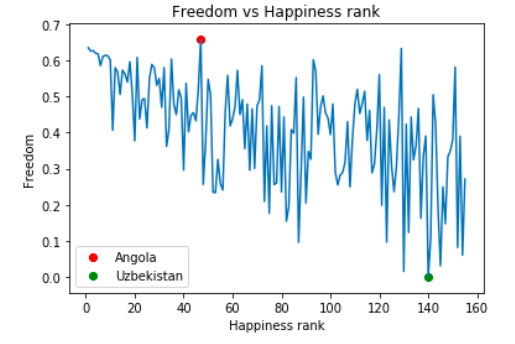
Here's what calling our program might look like:
```python
     expect(main('world_happiness_ranking_2017.csv'), None)
```

### Step 2a: Building
#### Design data definitions

the function will have the following data definition:

+ Compound: CountryData which contains 
       - the name
       - the happiness rank
       - freedom
+ a List of CountryData
+ We need this data since we will later be plotting a line graph according to their happiness rank and freedom and also a red point on the happiness rank with the highest freedom.

In [3]:

from typing import NamedTuple, List
import csv
from matplotlib import pyplot

CountryData = NamedTuple('CountryData',[('name',str),
                                        ('happiness_rank',int),         # in range [1,155]
                                        ('freedom',float)])   #in range [0,1]
# interp. the happiness data of a country which includes the name of the country('name')
# the happiness rank('rank') and the Freedom('freedom') of a country

CD1 = CountryData ('Norway' , 1 , 0.635422587)
CD2 = CountryData ('United States' , 14 , 0.505740523)
CD3 = CountryData ('Brazil' , 22 , 0.437453747)
CD4 = CountryData ('Slovakia' , 40 , 0.295817465) 
CD5 = CountryData ('Russia' , 49 , 0.373783112)
CD6 = CountryData ('South Korea' , 55 , 0.257921666)
CD7 = CountryData ('Ukraine' , 132 , 0.122974776)

# template based on compound (3 fields)

def fn_for_country_data(cd: CountryData) -> ...:
    return ...(cd.name,
               cd.happiness_rank,
               cd.freedom)

# List[CountryData]
# interp. a list of Country Datas

L0 = []
L1 = [CD1,CD2,CD3,CD4,CD5,CD6,CD7]
L2 = [CD5,CD3,CD4,CD1,CD6,CD7,CD2]
# template based on List[CountryData] with reference rule

def fn_for_locd(locd: List[CountryData]) -> ...:      
    # description of acc
    acc = ... # type: ...
    
    for cd in locd:
        acc = ...(fn_for_country_data(cd), acc)
        
    return ...(acc)

### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

In [8]:
###########
# Functions


def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, 
    returns a graph with the happiness rank on the x-axis and 
    freedom on the y-axis and also plots the point with highest
    freedom and lowest freedom with their names
    If the list in in random order then it first filters into ascending order on the basis of happiness rank
    If it is an empty file then it would show a blank graph.
    """
    # return None #stub
    # Template from HtDAP, based on function composition:
    # 1.Read the given file and store the information as locd(List[Countrydata])
    # 2.Analyzes the Data and returns a line-graph of the countries happiness rank(x-axis) and 
    # freedom(y-axis) from locd.Also draws a red point on the maximum freedom and a green point
    # on the minimum freedom and also displays their name.It shows a blank graph if the file is empty
    
    return analyze(read(filename)) 
    
    


def read(filename: str) -> List[CountryData]:
    """    
    reads information from the specified file and returns the information as a list of CountryData
    """
    # return []  #stub
    # Template from HtDAP
    # locd contains the CountryData so far
    locd = [] # type: List[CountryData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            cd = CountryData(row[0],
                             parse_int(row[1]),
                             parse_float(row[8]))
            locd.append(cd)
    
    return locd


def analyze(locd: List[CountryData]) -> None: 
    """ 
    Draw a line-graph of the countries happiness rank(x-axis) and freedom(y-axis) from locd.
    Also draws a red point on the maximum freedom and a green point on the minimum freedom and 
    also displays their name.
    It shows a blank graph if the file is empty
    
    Always returns None.
    """ 
    # return None  #stub
    # template based on visualization
    
    # set the labels for the axes
    if locd == [] :
        pyplot.xlabel("Happiness rank")
        pyplot.ylabel("Freedom")
        pyplot.title("Freedom vs Happiness rank")
        
        # show the plot
        pyplot.show()
        
    # set the labels for the axes
    else:
        pyplot.xlabel("Happiness rank")
        pyplot.ylabel("Freedom")
        pyplot.title("Freedom vs Happiness rank")
        
        x_values = get_sorted_rank_list(locd)
        y_values = get_freedom_list(locd)
        p1=pyplot.plot(x_values, y_values)
   
        y_max = get_max_freedom(locd)
        x_max = get_rank_of_max_freedom(locd,y_max)
        y_min = get_min_freedom(locd)
        x_min = get_rank_of_min_freedom(locd,y_min)
        min_name = find_name(locd,x_min)
        max_name = find_name(locd,x_max)
        
        p2=pyplot.scatter(x_max,y_max, c='r', marker='o',label= max_name)
        p3=pyplot.scatter(x_min,y_min, c='g', marker='o',label= min_name)

        pyplot.legend(loc = "best")

        # show the plot
        pyplot.show()
    return None


def get_sorted_rank_list(locd:List[CountryData])->List[int]:
    """
    returns a sorted rank list from locd
    """
    #return [] #stub
    #template from composition:
    #1) get rank list from locd
    #2) sort the rank list and return
    return sorting(get_rank_list(locd))
    

def get_rank_list(locd: List[CountryData]) -> List[int]:
    """
    returns a list of happiness ranks of countries from locd
    """
    # return [] #stub
    # template from List[CountryData]
    # contains List of happiness ranks so far
    acc = [] # type: List[int]
    
    for cd in locd:
        acc.append(cd.happiness_rank)
        
    return acc


def get_freedom_list(locd: List[CountryData]) -> List[float]:
    """
    returns a list of freedom of countries from locd
    """
    # return [] #stub
    # template from List[CountryData]
    # contains List of freedom so far
    acc = [] # type: List[float]
    
    for cd in locd:
        acc.append(cd.freedom)
        
    return acc


def get_max_freedom(locd: List[CountryData]) -> float:
    """
    returns the maximum freedom from freedom of a countries from locd
    """
    # return [] #stub
    # template from List[CountryData]
    # contains the maximum freedom value so far
    acc = 0 # type: int       # because the min freedom value can be 0
    for cd in locd:        
        if is_max(cd.freedom,acc):
            acc = cd.freedom
    return acc


def get_rank_of_max_freedom(locd: List[CountryData], max_freedom : float) -> int:
    """
    returns the rank of the country with maximum freedom from locd
    """
    # return [] #stub
    # template from List[CountryData]
    # contains rank of the country with maximum freedom so far
    acc = 0 # type: int
    
    for cd in locd:
        if find_rank(cd.freedom,max_freedom):
            acc = cd.happiness_rank
    return acc


def is_max(num1:float, num2:float)->bool:
    """
    returns True if num1 is greater than num2 and False otherwise
    """
    # return True #stub
    # template from Atomic distinct value
    return num1>num2


def find_rank(num1:float , num2:float)->bool:
    """
    returns True if num1 is equal to num2 and False otherwise

    """
    #return True #stub
    #template from Atomic non distinct
    return num1==num2


def get_min_freedom(locd: List[CountryData]) -> float:
    """
    returns the minimum freedom from freedom of a countries from locd
    """
    # return [] #stub
    # template from List[CountryData]
    # contains minimum freedom value so far
    acc = 1 # type: float         # because maximum freedom vlue can be 1
    for cd in locd:        
        if is_min(cd.freedom,acc):
            acc = cd.freedom
    return acc
        

def get_rank_of_min_freedom(locd: List[CountryData], min_freedom : float) -> int:
    """
    returns the rank of the country with minimum freedom from locd
    """
    # return [] #stub
    # template from List[CountryData]
    # contains rank of country with minimum freedom so far
    acc = 0 # type: int    
    for cd in locd:
        if find_rank(cd.freedom,min_freedom):
            acc = cd.happiness_rank
    return acc


def is_min(num1:float, num2:float)->bool:
    """
    returns True if num1 is less than num2 and False otherwise
    """
    # return True #stub
    # template from Atomic distinct value
    return num1<num2


def find_name(locd:List[CountryData],rank:int)-> str:
    """
    returns the name of the country of the given happiness rank from locd
    """
    #return "" #stub
    #template from List[CountryData]
    #contains name of country with given rank from locd so far
    acc = ""    #Type:str
    for cd in locd:
        if check_rank(rank,cd.happiness_rank):
            acc = cd.name
    return acc


def check_rank(rank1:int,rank2:int)->bool:
    """
    returns True is rank1 is equal to rank2 and False otherwise
    """
    #return True #stub
    #template from atomic non distinct
    return rank1==rank2


def sorting(loi:List[int])->List[int]:
    """
    returns list of rank in increading order or happiness rank
    """
    #return [] #stub
    #template from Arbitrary-Sized 
    loi.sort()        
    return loi
    
    
#start_testing()
# Examples and tests for sorting
expect(sorting([]),[])
expect(sorting([0,3,5,7,2]),[0,2,3,5,7])

# Examples and tests for main
expect(main('blank_test.csv'),None)     # blank test
expect(main('test_1.csv'),None)         # test 2 (ranks in ascending order)
expect(main('test_2.csv'),None)         # test 3 (ranks in random order)

# Examples and tests for read
expect(read('blank_test.csv'), [])   # test 1
expect(read('test_1.csv'), [CountryData(name='Russia',               # test 2
                                        happiness_rank=49, 
                                        freedom=0.373783112),
                            CountryData(name='Belize', 
                                        happiness_rank=50,
                                        freedom=0.547509372), 
                            CountryData(name='Japan',
                                        happiness_rank=51,
                                        freedom=0.505625546),
                            CountryData(name='Lithuania',
                                        happiness_rank=52,
                                        freedom=0.234231785), 
                            CountryData(name='Algeria',
                                        happiness_rank=53,
                                        freedom=0.233335808),
                            CountryData(name='Latvia', 
                                        happiness_rank=54, 
                                        freedom=0.325707912), 
                            CountryData(name='South Korea', 
                                        happiness_rank=55, 
                                        freedom=0.257921666),
                            CountryData(name='Moldova',
                                        happiness_rank=56,
                                        freedom=0.240729049)])
expect(read('test_2.csv'),[CountryData(name='Uruguay',
                                       happiness_rank=28,
                                       freedom=0.579392254),
                           CountryData(name='Colombia',
                                       happiness_rank=36,
                                       freedom=0.477487415),
                           CountryData(name='Saudi Arabia',
                                       happiness_rank=37,
                                       freedom=0.449750572),
                           CountryData(name='Mexico', 
                                       happiness_rank=25,
                                       freedom=0.412730008),
                           CountryData(name='Singapore', 
                                       happiness_rank=26, 
                                       freedom=0.549840569),
                           CountryData(name='Costa Rica', 
                                       happiness_rank=12,
                                       freedom=0.58013165),
                           CountryData(name='Austria', 
                                       happiness_rank=13,
                                       freedom=0.56776619),
                           CountryData(name='United States', 
                                       happiness_rank=14, 
                                       freedom=0.505740523)])

# Examples and tests for analyze 
expect(analyze(L0),None)
expect(analyze(L1),None)
expect(analyze([CountryData(name='Russia',
                            happiness_rank=49, 
                            freedom=0.373783112),
                CountryData(name='Belize', 
                            happiness_rank=50,
                            freedom=0.547509372), 
                CountryData(name='Japan',
                            happiness_rank=51,
                            freedom=0.505625546),
                CountryData(name='Lithuania',
                            happiness_rank=52,
                            freedom=0.234231785), 
                CountryData(name='Algeria',
                            happiness_rank=53,
                            freedom=0.233335808),
                CountryData(name='Latvia', 
                            happiness_rank=54, 
                            freedom=0.325707912), 
                CountryData(name='South Korea', 
                            happiness_rank=55, 
                            freedom=0.257921666),
                CountryData(name='Moldova',
                            happiness_rank=56,
                            freedom=0.240729049)]),None) 


# Examples and tests for get_rank_list
expect(get_rank_list(L0),[])
expect(get_rank_list(L1),[1,14,22,40,49,55,132])

# Examples and tests for get_freedom_list
expect(get_freedom_list(L0),[])
expect(get_freedom_list(L1),[0.635422587,
                             0.505740523,
                             0.437453747,
                             0.295817465,
                             0.373783112,
                             0.257921666,
                             0.122974776])
# Examples and tests for get_max_freedom
expect(get_max_freedom(L0),0)
expect(get_max_freedom(L1),0.635422587)

# Examples and tests for get_rank_of_max_freedom
expect(get_rank_of_max_freedom(L0,0),0)
expect(get_rank_of_max_freedom(L1,0.635422587),1)

# Examples and tests for is_max
expect(is_max(2.34,2.33), True) 
expect(is_max(2.03,2.45), False) 

# Examples and tests for find_rank
expect(find_rank(2,2), True)
expect(find_rank(2,3), False)

# Examples and tests for get_min_freedom
expect(get_min_freedom(L0),1)
expect(get_min_freedom(L1),0.122974776)

# Examples and tests for get_rank_of_min_freedom
expect(get_rank_of_min_freedom(L0,0),0)
expect(get_rank_of_min_freedom(L1,0.122974776),132)

# Examples and tests for is_min
expect(is_min(1.55,1.54), False)
expect(is_min(1.50,1.55),True)

# Examples and tests for find_name
expect(find_name(L0,0),'')
expect(find_name(L1,1),'Norway')

# Examples and tests for check_rank
expect(check_rank(1,1),True)
expect(check_rank(1,2),False)

# Examples and tests for sorting
expect(sorting([]),[])
expect(sorting([0,3,5,7,2]),[0,2,3,5,7])
expect(sorting([1,2,3,4,5]),[1,2,3,4,5])

# Examples and tests for get_sorted_rank_list
expect(get_sorted_rank_list(L0),[])
expect(get_sorted_rank_list(L1),[1, 14, 22, 40, 49, 55, 132])
expect(get_sorted_rank_list(L2),[1, 14, 22, 40, 49, 55, 132])

#summary()

NameError: name 'expect' is not defined

In [5]:
main('world_happiness_ranking_2017.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'world_happiness_ranking_2017.csv'

Object `start_testing()` not found.
